# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Risya Annisa' Chairyah
- **Email:** risyaannisachairyah1411@gmail.com
- **ID Dicoding:** risyaannisachairyah

## Menentukan Pertanyaan Bisnis

- Kapan Waktu Puncak Penggunaan Sepeda?
- Apa yang Mempengaruhi Penggunaan Sepeda oleh Pengguna Kasual dan Terdaftar?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("https://raw.githubusercontent.com/risya22008/submission/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/risya22008/submission/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- terdapat 2 df
- pada day_df terdapat 16 kolom
- pada hour_df terdapat 17 kolom

### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada proses assessing data ini dapat dilihat tidak ada missing data pada day_df dan hour_df
- Setiap kolom pada day_df dan hour_df memiliki nilai 0 yang menunjukkan bahwa semua baris memiliki data yang valid
- Tabel day ini memiliki 731 entri data dan 16 kolom
- Tabel hour ini memiliki 17.379 entri data dan 17 kolom
- Tidak ada duplikasi di tabel day
- Tidak ada duplikasi di tabel hour
- Pada tabel day ada 11 kolom dengan tipe data int64, 4 kolom dengan tipe float64, dan 1 kolom dengan tipe object. Kolom dteday bertipe object, sebaiknya diubah menjadi tipe datetime untuk proses analisis yang lebih baik.
- Pada tabel hour ada 12 kolom dengan tipe data int64, 4 kolom dengan tipe float64, dan 1 kolom dengan tipe object. Kolom dteday bertipe object, sebaiknya diubah menjadi tipe datetime untuk proses analisis yang lebih baik.

### Cleaning Data

In [ ]:
day_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Insight:**
- Sudah dilakukan proses cleaning data yaitu dengan mengconvert tipe data kolom dteday pada tabel day dan tabel hour yang memiliki tipe data object menjadi format datetime
- setelah convert tipe data, sudah dapat melakukan operasi seperti ekstraksi informasi waktu (tahun, bulan, hari) yang dapat berguna untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore Data day_df


In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011-01-16 15:02:12.968536320,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-01-08 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2011-01-16 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2011-01-24 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2011-02-02 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [ ]:
day_df.groupby(by=["season", "weekday"]).agg({
    "cnt": "sum"
}).reset_index()

,season,weekday,cnt
0,1,0,60195
1,1,1,63771
2,1,2,69813
3,1,3,65277
4,1,4,72355
5,1,5,74264
6,1,6,65673
7,2,0,129650
8,2,1,123255
9,2,2,125449


In [ ]:
day_df.groupby(by="season").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})

,casual,registered,cnt
season,,,
1,334.928177,2269.204420,2604.132597
2,1106.097826,3886.233696,4992.331522
3,1202.611702,4441.691489,5644.303191
4,729.112360,3999.050562,4728.162921


In [ ]:
day_df.groupby(by="workingday").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})

,casual,registered,cnt
workingday,,,
0,1371.134199,2959.034632,4330.168831
1,606.570000,3978.250000,4584.820000


In [ ]:
day_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

,weathersit,casual,registered,cnt
0,1,446346,1811606,2257952
1,2,169776,827082,996858
2,3,3895,33974,37869


In [ ]:
day_df.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

,weekday,casual,registered,cnt
0,0,140521,303506,444027
1,1,70784,384719,455503
2,2,57843,411266,469109
3,3,57319,415729,473048
4,4,61460,423935,485395
5,5,78238,409552,487790
6,6,153852,323955,477807


### Explore Data hour_df


In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
hour_df.groupby(by="hr").agg({
    "cnt": "sum"
}).reset_index().sort_values(by="cnt", ascending=False)

,hr,cnt
17,17,336860
18,18,309772
8,8,261001
16,16,227748
19,19,226789
13,13,184919
12,12,184414
15,15,183149
14,14,175652
20,20,164550


In [ ]:
hour_df.groupby(by="hr").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
}).reset_index()

,hr,casual,registered,cnt
0,0,10.158402,43.739669,53.898072
1,1,6.504144,26.871547,33.375691
2,2,4.772028,18.097902,22.869930
3,3,2.715925,9.011478,11.727403
4,4,1.253945,5.098996,6.352941
5,5,1.411437,18.478382,19.889819
6,6,4.161379,71.882759,76.044138
7,7,11.055021,201.009629,212.064649
8,8,21.679505,337.331499,359.011004
9,9,30.891334,188.418157,219.309491


In [ ]:
combined_df = pd.merge(day_df, hour_df, on="dteday", suffixes=('_day', '_hour'))
combined_df.head()

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hour_df.groupby(by="workingday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

,workingday,casual,registered,cnt
0,0,316732,683537,1000269
1,1,303285,1989125,2292410


**Insight:**
- Jumlah total pengguna sepeda (cnt) bervariasi tergantung pada musim, hari kerja, dan kondisi cuaca.
- Penggunaan sepeda cenderung lebih tinggi pada musim semi dan musim panas, sementara menurun pada musim gugur dan musim dingin.
- Pada hari kerja, pengguna terdaftar (registered) mendominasi penggunaan sepeda, sedangkan pada akhir pekan, pengguna kasual (casual) lebih banyak menggunakan sepeda.
- Penggunaan sepeda lebih tinggi pada hari-hari dengan cuaca cerah (weathersit = 1) dan menurun secara signifikan pada hari-hari dengan cuaca buruk (weathersit = 3 atau 4).
- Pengguna terdaftar cenderung menggunakan sepeda pada jam sibuk (pagi dan sore hari), sementara pengguna kasual cenderung menggunakan sepeda pada waktu yang lebih fleksibel, terutama pada akhir pekan.
- Terdapat korelasi positif antara suhu (temp) dan jumlah penggunaan sepeda (cnt), yang menunjukkan bahwa semakin hangat suhu, semakin banyak pengguna sepeda.
- Sebaliknya, kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif dengan penggunaan sepeda, yang berarti kondisi dengan kelembaban tinggi dan angin kencang cenderung mengurangi jumlah pengguna.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan Waktu Puncak Penggunaan Sepeda?

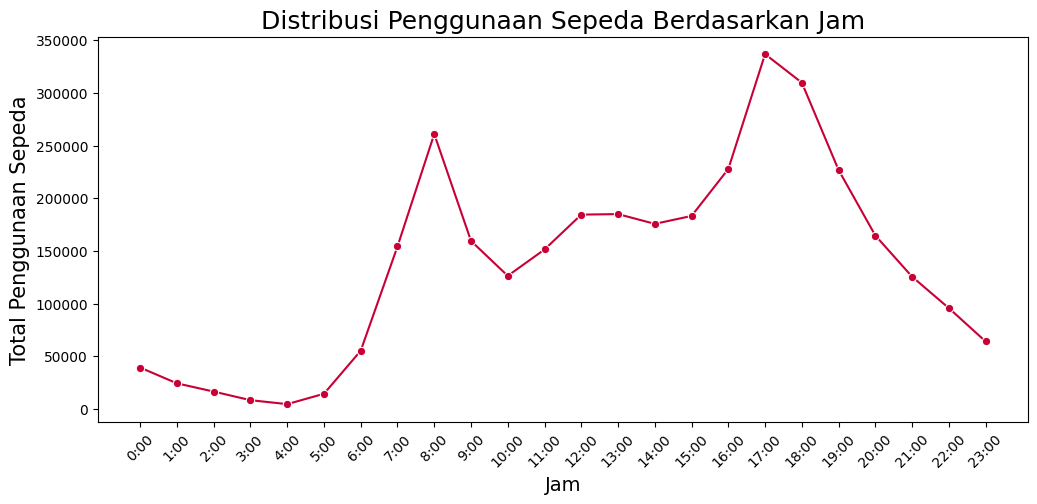

In [ ]:
hourly_usage_df = hour_df.groupby("hr").agg({
    "cnt": "sum"
}).reset_index()

hourly_usage_df['hr'] = hourly_usage_df['hr'].apply(lambda x: f"{x}:00")

plt.figure(figsize=(12, 5))
sns.lineplot(x="hr", y="cnt", data=hourly_usage_df, marker='o', color="#C80036")
plt.title("Distribusi Penggunaan Sepeda Berdasarkan Jam", fontsize=18)
plt.xlabel("Jam", fontsize=14)
plt.ylabel("Total Penggunaan Sepeda", fontsize=15)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


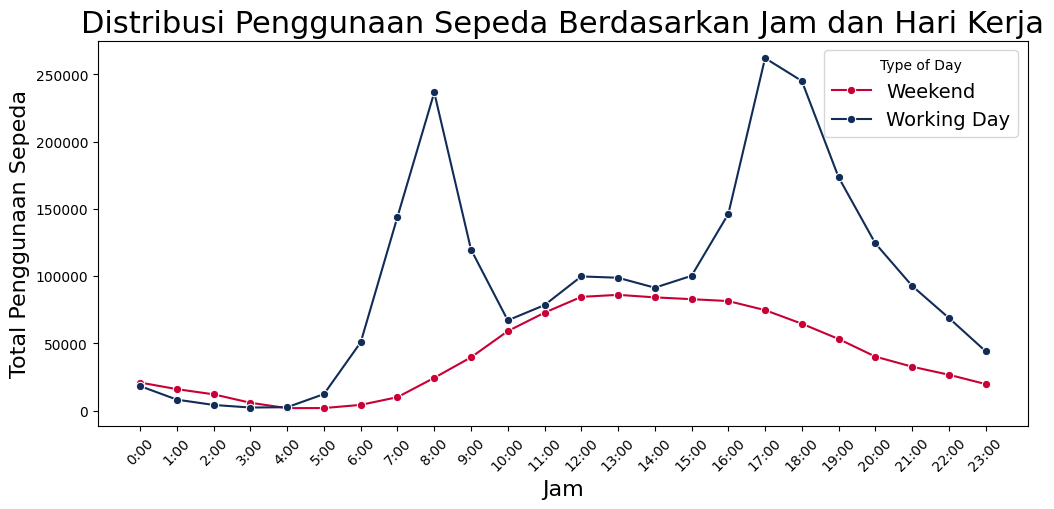

In [ ]:
hourly_workingday_df = hour_df.groupby(["hr", "workingday"]).agg({
    "cnt": "sum"
}).reset_index()

hourly_workingday_df['hr'] = hourly_workingday_df['hr'].apply(lambda x: f"{x}:00")
hourly_workingday_df['workingday'] = hourly_workingday_df['workingday'].apply(lambda x: 'Working Day' if x == 1 else 'Weekend')

plt.figure(figsize=(12, 5))
sns.lineplot(x="hr", y="cnt", hue="workingday", data=hourly_workingday_df, marker='o', palette=["#C80036", "#102C57"])
plt.title("Distribusi Penggunaan Sepeda Berdasarkan Jam dan Hari Kerja", fontsize=22)
plt.xlabel("Jam", fontsize=16)
plt.ylabel("Total Penggunaan Sepeda", fontsize=16)
plt.xticks(rotation=45)
plt.legend(title="Type of Day", fontsize=14)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

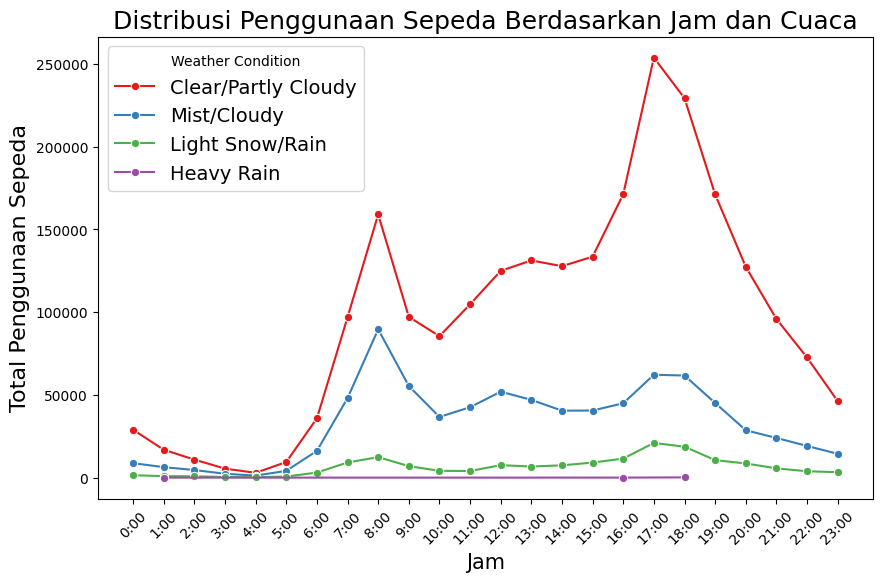

In [ ]:
hourly_weather_df = hour_df.groupby(["hr", "weathersit"]).agg({
    "cnt": "sum"
}).reset_index()

hourly_weather_df['hr'] = hourly_weather_df['hr'].apply(lambda x: f"{x}:00")
weather_labels = {1: 'Clear/Partly Cloudy', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain'}
hourly_weather_df['weathersit'] = hourly_weather_df['weathersit'].map(weather_labels)

plt.figure(figsize=(10, 6))
sns.lineplot(x="hr", y="cnt", hue="weathersit", data=hourly_weather_df, marker='o', palette="Set1")
plt.title("Distribusi Penggunaan Sepeda Berdasarkan Jam dan Cuaca", fontsize=18)
plt.xlabel("Jam", fontsize=15)
plt.ylabel("Total Penggunaan Sepeda", fontsize=16)
plt.xticks(rotation=45)
plt.legend(title="Weather Condition", fontsize=14)
plt.show()


### Pertanyaan 2: Apa yang Mempengaruhi Penggunaan Sepeda oleh Pengguna Kasual dan Terdaftar?

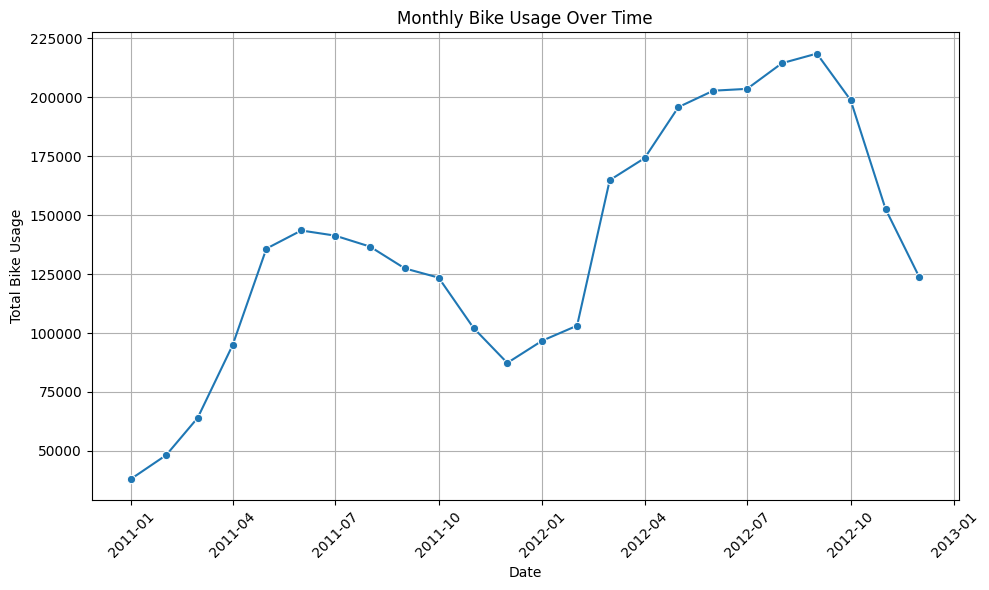

In [ ]:
# Grouping the data by month and year for total bike usage
monthly_usage = day_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

# Adjust year (0 -> 2011, 1 -> 2012)
monthly_usage['year'] = monthly_usage['yr'].apply(lambda x: 2011 if x == 0 else 2012)

# Rename 'mnth' to 'month' for proper date conversion
monthly_usage.rename(columns={'mnth': 'month'}, inplace=True)

# Create a proper date column combining year, month, and setting day as 1
monthly_usage['date'] = pd.to_datetime(monthly_usage[['year', 'month']].assign(day=1))

# Plotting the total bike usage for each month
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_usage, x='date', y='cnt', marker="o")
plt.title('Monthly Bike Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Total Bike Usage')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


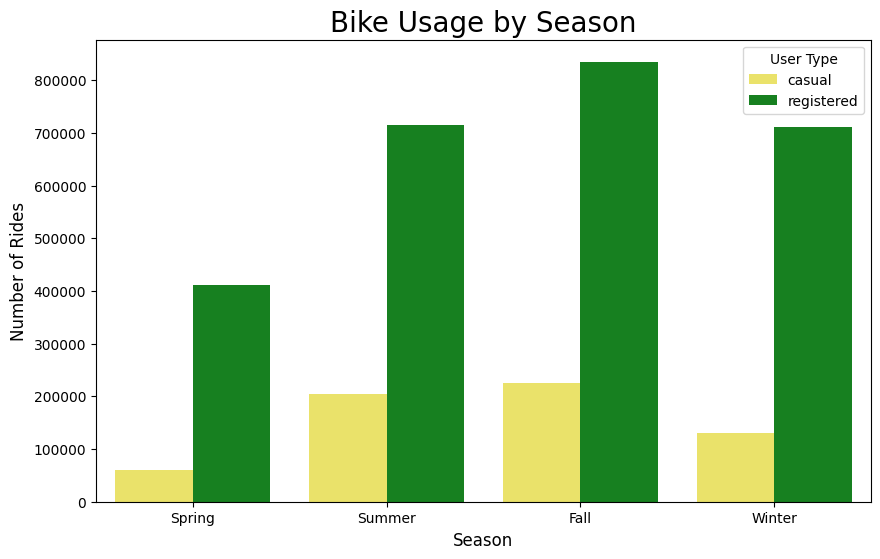

In [ ]:
season_df = day_df.groupby("season")[["casual", "registered"]].sum().reset_index()
season_df["season"] = season_df["season"].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
season_df = pd.melt(season_df, id_vars="season", var_name="user_type", value_name="ride_count")

plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="ride_count", hue="user_type", data=season_df, palette=["#FFF455", "#059212"])
plt.title("Bike Usage by Season", fontsize=20)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.legend(title="User Type")
plt.show()

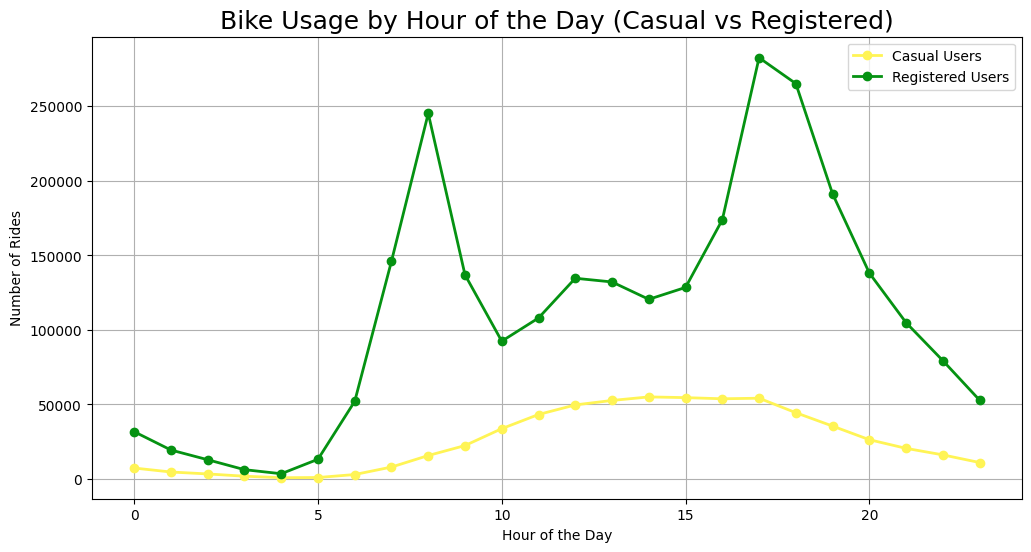

In [ ]:
hourly_usage_df = hour_df.groupby("hr")[["casual", "registered"]].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_usage_df["hr"], hourly_usage_df["casual"], marker='o', linewidth=2, color="#FFF455", label='Casual Users')
plt.plot(hourly_usage_df["hr"], hourly_usage_df["registered"], marker='o', linewidth=2, color="#059212", label='Registered Users')
plt.title("Bike Usage by Hour of the Day (Casual vs Registered)", fontsize=18)
plt.xlabel("Hour of the Day", fontsize=10)
plt.ylabel("Number of Rides", fontsize=10)
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


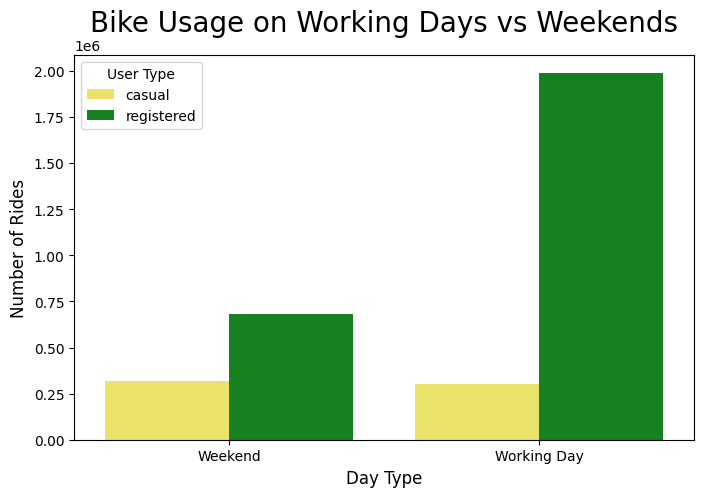

In [ ]:
weekday_df = day_df.groupby("workingday")[["casual", "registered"]].sum().reset_index()
weekday_df["workingday"] = weekday_df["workingday"].replace({0: "Weekend", 1: "Working Day"})
weekday_df = pd.melt(weekday_df, id_vars="workingday", var_name="user_type", value_name="ride_count")

plt.figure(figsize=(8, 5))
sns.barplot(x="workingday", y="ride_count", hue="user_type", data=weekday_df, palette=["#FFF455", "#059212"])
plt.title("Bike Usage on Working Days vs Weekends", fontsize=20)
plt.xlabel("Day Type", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.legend(title="User Type")
plt.show()



**Insight:**
- Terdapat hubungan positif antara suhu (temp) dan jumlah penggunaan sepeda (cnt), serta hubungan negatif antara kelembaban (hum) dan penggunaan sepeda.
- Penggunaan sepeda lebih tinggi pada hari yang bukan hari kerja
- Pengguna terdaftar lebih banyak bersepeda pada hari kerja dan mengikuti pola jam kerja (pagi dan sore)
- Pengguna kasual lebih banyak muncul pada akhir pekan dan hari libur, serta cenderung bersepeda pada siang hingga sore hari.
- Visualisasi memperkuat temuan dari EDA, di mana penggunaan sepeda dipengaruhi oleh waktu (hari, jam) dan kondisi cuaca.
- Cuaca sangat berpengaruh terhadap jumlah pengguna sepeda. Cuaca cerah (weathersit = 1) mendorong peningkatan penggunaan sepeda, sementara cuaca buruk (hujan deras atau salju, weathersit = 3 atau 4) menyebabkan penurunan penggunaan.
- Suhu (temp) yang lebih tinggi berkorelasi dengan jumlah pengguna yang lebih banyak. Pengguna cenderung lebih aktif pada hari-hari dengan suhu yang nyaman (tidak terlalu panas atau terlalu dingin).

## Analisis Lanjutan (Opsional)

  temp_group         cnt     casual  registered
0       High  263.833948  59.595084  204.238863
1        Low   77.341803   5.514445   71.827358
2     Medium  169.199225  27.039770  142.159455


<ipython-input-65-620bd2c9580a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_group', y='cnt', data=grouped_temp_usage, palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: Wh

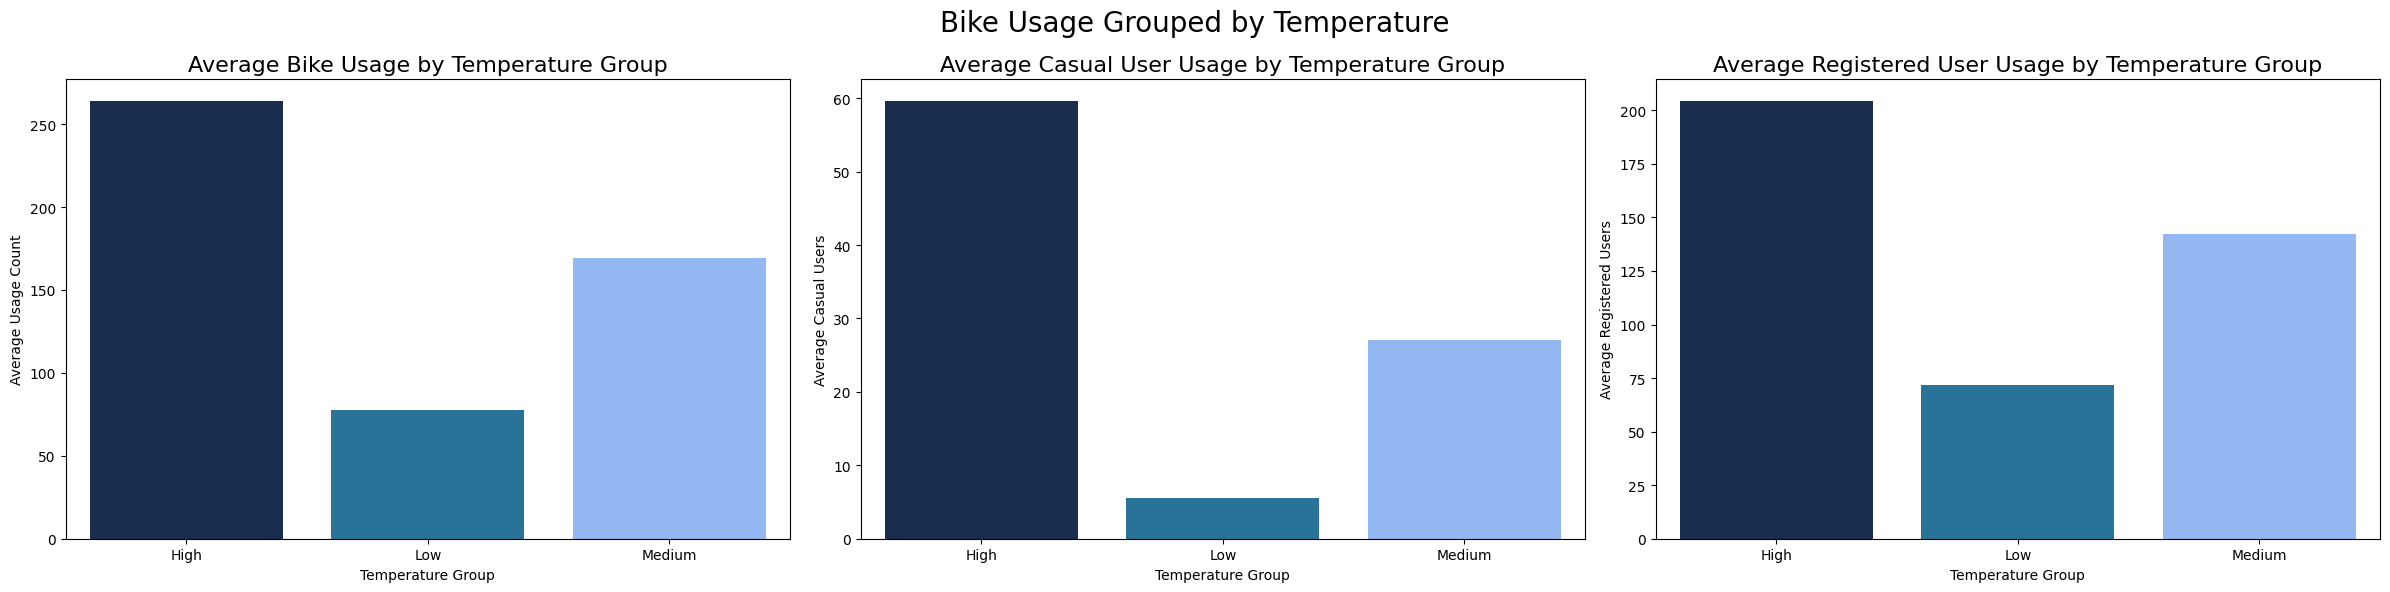

In [ ]:
def temp_group(temp_value):
    if temp_value < 0.3:
        return 'Low'
    elif 0.3 <= temp_value < 0.6:
        return 'Medium'
    else:
        return 'High'

hour_df['temp_group'] = hour_df['temp'].apply(temp_group)

grouped_temp_usage = hour_df.groupby('temp_group').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean',
}).reset_index()

print(grouped_temp_usage)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

colors = ["#102C57", "#1679AB", "#83B4FF"]

sns.barplot(x='temp_group', y='cnt', data=grouped_temp_usage, palette=colors, ax=ax[0])
ax[0].set_title('Average Bike Usage by Temperature Group', fontsize=16)
ax[0].set_ylabel('Average Usage Count')
ax[0].set_xlabel('Temperature Group')

sns.barplot(x='temp_group', y='casual', data=grouped_temp_usage, palette=colors, ax=ax[1])
ax[1].set_title('Average Casual User Usage by Temperature Group', fontsize=16)
ax[1].set_ylabel('Average Casual Users')
ax[1].set_xlabel('Temperature Group')

sns.barplot(x='temp_group', y='registered', data=grouped_temp_usage, palette=colors, ax=ax[2])
ax[2].set_title('Average Registered User Usage by Temperature Group', fontsize=16)
ax[2].set_ylabel('Average Registered Users')
ax[2].set_xlabel('Temperature Group')

plt.suptitle('Bike Usage Grouped by Temperature', fontsize=20)
plt.tight_layout()
plt.show()


## Conclusion

- Conclution pertanyaan 1: Waktu puncak penggunaan sepeda terjadi pada pagi hari (sekitar pukul 8-9 pagi) dan sore hari (sekitar pukul 5-6 sore). Tren ini terlihat pada hari kerja (weekday). Pada akhir pekan (weekend), waktu puncak sedikit berbeda dan lebih tersebar sepanjang hari.
- Conclution pertanyaan 2: Musim:
Penggunaan sepeda lebih tinggi pada musim semi (spring) dan musim panas (summer), dan menurun pada musim gugur (fall) dan musim dingin (winter).
Cuaca: Kondisi cuaca yang cerah dan tidak terlalu berangin cenderung meningkatkan penggunaan sepeda. Sebaliknya, kondisi hujan atau salju mengurangi penggunaan.
Kategori Pengguna: Pengguna terdaftar (registered) lebih konsisten menggunakan sepeda pada hari kerja, sementara pengguna kasual cenderung lebih banyak muncul pada akhir pekan atau hari-hari libur.